In [1]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import easyocr

c:\Users\untu0\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
from googletrans import Translator
import asyncio

async def sync_translate(text, dest='id'):
    translator = Translator()
    result = await translator.translate(text, dest=dest)
    return result.text

async def translate_text(text):
    translated = await sync_translate(text)
    return translated
    print(translated)

await translate_text("what are you doing!")



# asyncio.run(translate_text("panjengan apik"))


'Apa yang sedang kamu lakukan!'

In [3]:
def take_color(image_path, x=5,y=5):
    img = Image.open(image_path)
    return img.getpixel((x,y))
    return (r,g,b)

color = take_color('image-3.png', x=100, y=100)
print(color)

(227, 212, 166, 255)


In [4]:
image = Image.open('image-3.png').convert("RGBA")

draw = ImageDraw.Draw(image)

(240, 240, 240, 255) 285 44
(240, 240, 240, 255) 521 54
(240, 240, 240, 255) 1024 76
(240, 240, 240, 255) 520 93
(240, 240, 240, 255) 1029 108
(240, 240, 240, 255) 217 122
(240, 240, 240, 255) 508 131
(240, 240, 240, 255) 399 164
(240, 240, 240, 255) 498 170
(240, 240, 240, 255) 974 186
(240, 240, 240, 255) 995 210
(240, 240, 240, 255) 845 252
(240, 240, 240, 255) 967 255
(240, 240, 240, 255) 333 264
(240, 240, 240, 255) 879 326
(240, 240, 240, 255) 503 605
(240, 240, 240, 255) 717 594
(240, 240, 240, 255) 1024 603
(240, 240, 240, 255) 280 636
(240, 240, 240, 255) 482 636
(240, 240, 240, 255) 903 628
(240, 240, 240, 255) 1070 638
(240, 240, 240, 255) 409 668
(240, 240, 240, 255) 1048 675
(240, 240, 240, 255) 1003 698
(240, 240, 240, 255) 825 990
(240, 240, 240, 255) 872 1001


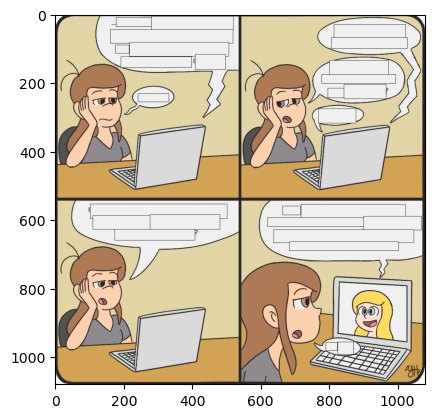

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import nest_asyncio
nest_asyncio.apply()

async def main():
    # Membaca gambar
    image = Image.open('image-3.png').convert("RGBA")

    draw_image = ImageDraw.Draw(image) 

    reader = easyocr.Reader(['en'])
    results = reader.readtext('image-3.png', width_ths=2, slope_ths=0.4, link_threshold=0.4)

    font = ImageFont.truetype("arial.ttf", 16)
    top_left = results[0][0][0]
    x = top_left[0]
    y = top_left[1]
    color = take_color('image-3.png', x=x, y=y)

    # Memproses bounding box dan mengganti teks
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        x,y = top_right[0]+1, bottom_left[1]+8
        translated_text = await translate_text(text)

        draw_image.rectangle([top_left, bottom_right], fill=color,outline= 'black')
        # Asumsi fungsi take_color() sudah didefinisikan dan dapat dipanggil tanpa argumen
        # color_plate = take_color(top_left)
        print(color, x,y)
        # Menambahkan teks terjemahan di dalam bounding box
        text_position = (top_left[0]+5, bottom_left[1]+(int(top_left[1] - bottom_left[1])/2)-10)
        draw_image.text(text_position, translated_text, fill="black", font=font)

    # Menyimpan gambar hasil perubahan
    plt.imshow(image)
    image.save('translated_comic_page.png')

if __name__ == "__main__":
    import asyncio
    asyncio.get_event_loop().run_until_complete(main())

(240, 240, 240, 255) 285 44
(240, 240, 240, 255) 521 54
(240, 240, 240, 255) 1024 76
(240, 240, 240, 255) 520 93
(240, 240, 240, 255) 1029 108
(240, 240, 240, 255) 217 122
(240, 240, 240, 255) 508 131
(240, 240, 240, 255) 399 164
(240, 240, 240, 255) 498 170
(240, 240, 240, 255) 974 186
(240, 240, 240, 255) 995 210
(240, 240, 240, 255) 845 252
(240, 240, 240, 255) 967 255
(240, 240, 240, 255) 333 264
(240, 240, 240, 255) 879 326
(240, 240, 240, 255) 503 605
(240, 240, 240, 255) 717 594
(240, 240, 240, 255) 1024 603
(240, 240, 240, 255) 280 636
(240, 240, 240, 255) 482 636
(240, 240, 240, 255) 903 628
(240, 240, 240, 255) 1070 638
(240, 240, 240, 255) 409 668
(240, 240, 240, 255) 1048 675
(240, 240, 240, 255) 1003 698
(240, 240, 240, 255) 825 990
(240, 240, 240, 255) 872 1001


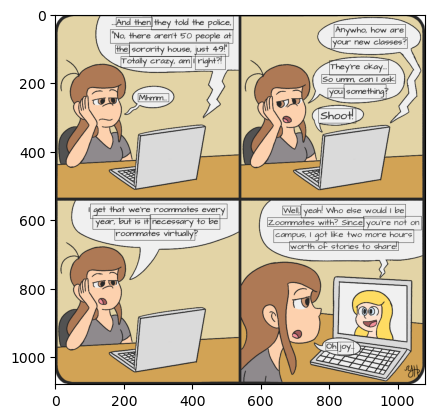

In [9]:
from PIL import Image, ImageDraw, ImageFont
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import nest_asyncio
nest_asyncio.apply()

async def main():
    # Membaca gambar
    image = Image.open('image-3.png').convert("RGBA")

    draw_image = ImageDraw.Draw(image) 

    reader = easyocr.Reader(['en'])
    results = reader.readtext('image-3.png', width_ths=2, slope_ths=0.4, link_threshold=0.4)

    font = ImageFont.truetype("arial.ttf", 16)
    top_left = results[0][0][0]
    x = top_left[0]
    y = top_left[1]
    color = take_color('image-3.png', x=x, y=y)

    # Memproses bounding box dan mengganti teks
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        x,y = top_right[0]+1, bottom_left[1]+8
        # translated_text = await translate_text(text)

        draw_image.rectangle([top_left, bottom_right],  outline = 'black')
        # Asumsi fungsi take_color() sudah didefinisikan dan dapat dipanggil tanpa argumen
        # color_plate = take_color(top_left)
        print(color, x,y)
        # Menambahkan teks terjemahan di dalam bounding box
        text_position = (top_left[0]+5, bottom_left[1]+(int(top_left[1] - bottom_left[1])/2)-10)
        # draw_image.text(text_position, translated_text, fill="black", font=font)

    # Menyimpan gambar hasil perubahan
    plt.imshow(image)
    # image.save('translated_comic_page.png')

if __name__ == "__main__":
    import asyncio
    asyncio.get_event_loop().run_until_complete(main())

In [9]:
from PIL import Image, ImageDraw, ImageFont
import easyocr
import matplotlib.pyplot as plt
import numpy as np
# from your_translation_module import translate_text # Asumsi Anda punya modul terjemahan

async def main():
    # Membaca gambar
    image = Image.open('image-3.png').convert("RGBA")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 16)

    reader = easyocr.Reader(['en'])
    results = reader.readtext('image-3.png', width_ths=2, slope_ths=0.4, link_threshold=0.4)

    # Memproses bounding box dan mengganti teks
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Mengambil sampel warna latar belakang dari area bounding box
        # Kita ambil beberapa sampel titik di dalam bounding box dan mencari warna yang paling dominan
        sample_points = [(top_left[0] + 5, top_left[1] + 5),
                         (top_right[0] - 5, top_right[1] + 5),
                         (bottom_right[0] - 5, bottom_right[1] - 5),
                         (bottom_left[0] + 5, bottom_left[1] - 5),
                         ((top_left[0] + bottom_right[0]) // 2, (top_left[1] + bottom_right[1]) // 2)]

        colors = [image.getpixel(point) for point in sample_points]

        # Mencari warna yang paling sering muncul (modus)
        from collections import Counter
        color_counts = Counter(colors)
        most_common_color = color_counts.most_common(1)[0][0]

        # Menggambar rectangle dengan warna latar belakang sebagai fill
        draw.rectangle([top_left, bottom_right], outline=(255, 0, 0), width=1, fill=most_common_color)

        # Menerjemahkan teks (asumsi fungsi translate_text adalah asynchronous)
        translated_text = await translate_text(text)

        # Menambahkan teks terjemahan di dalam bounding box
        text_position = (top_left[0]+5, bottom_left[1]+(int(top_left[1] - bottom_left[1])/2)-5)
        draw.text(text_position, translated_text, fill="black", font=font)

    # Menyimpan gambar hasil perubahan
    plt.imshow(image)
    image.save('translated_comic_page.png')

if __name__ == "__main__":
    import asyncio
    asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop